# Business task

Explore the dataset by performing the exploratory data analysis and derive insights.

# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv('Downloads\\ds_salaries.csv')

# Dataset overview and statistical summary

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,3755.0,NaN,NaN,NaN,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,3755,4,SE,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,3755,4,FT,3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,3755,93,Data Engineer,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,3755.0,NaN,NaN,NaN,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_currency,3755,20,USD,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,3755.0,NaN,NaN,NaN,137570.38988,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
employee_residence,3755,78,US,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,3755.0,NaN,NaN,NaN,46.271638,48.58905,0.0,0.0,0.0,100.0,100.0
company_location,3755,72,US,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [7]:
#checking for null values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no null values in the dataset.

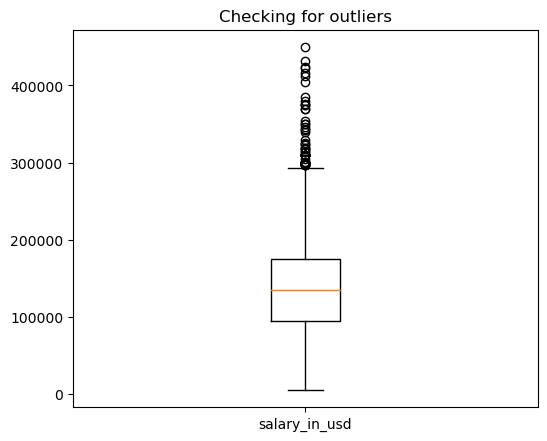

In [8]:
#checking for outlier in the salary_in_usd column
plt.figure(figsize=(6,5),dpi=100)
plt.boxplot(df['salary_in_usd'],labels=['salary_in_usd'])
plt.title('Checking for outliers');

In [9]:
def optimise_values(n):
    if n>upper_limit:
        return upper_limit
    return n

In [10]:
perc_25 = df['salary_in_usd'].quantile(.25)
perc_75 = df['salary_in_usd'].quantile(.75)

iqr = perc_75 - perc_25

upper_limit = perc_75 + 1.5 * iqr
upper_limit

295000.0

In [11]:
df['salary_in_usd']=df['salary_in_usd'].apply(optimise_values)

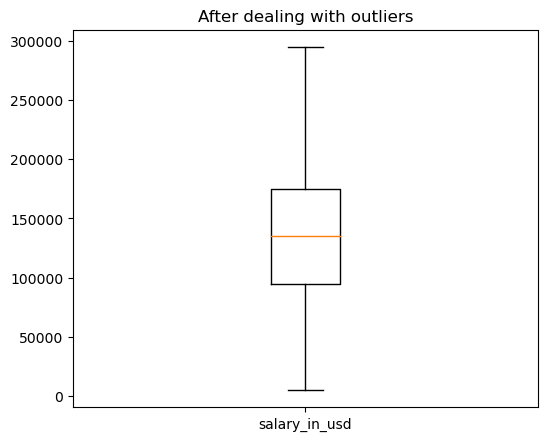

In [12]:
plt.figure(figsize=(6,5),dpi=100)
plt.boxplot(df['salary_in_usd'],labels=['salary_in_usd'])
plt.title('After dealing with outliers');

In [14]:
# converting work_year and remote_ratio to string
cols = ['work_year','remote_ratio']
for i in cols:
    df[cols] = df[cols].astype('str')

In [33]:
# convert work_year to datetime type
df['work_year']=pd.to_datetime(df['work_year'])

# EDA

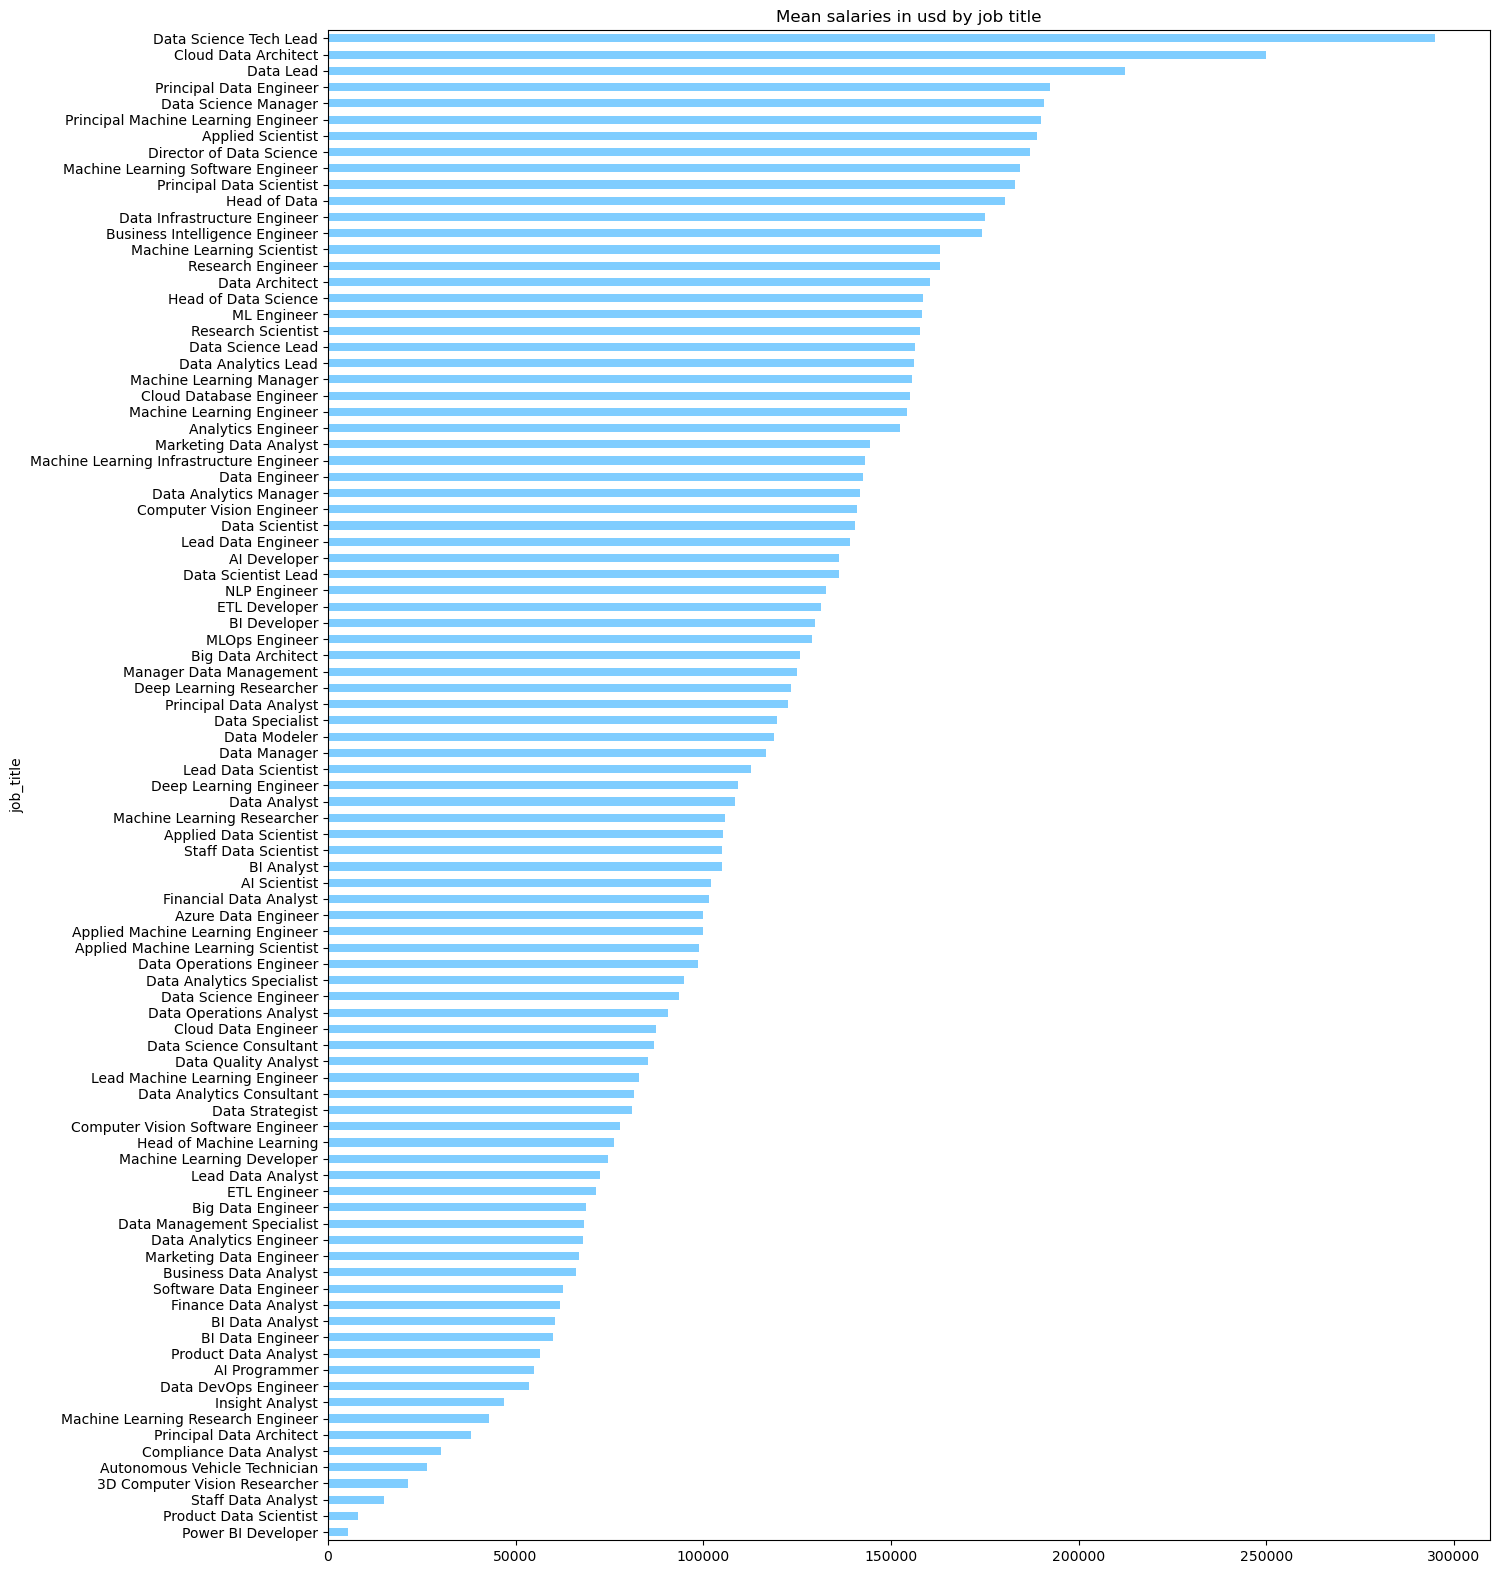

In [17]:
plt.figure(figsize=(15,20),dpi=100)
df.groupby('job_title').mean()['salary_in_usd'].sort_values(ascending=True).plot(kind='barh',color = '#7fcdff')
plt.title('Mean salaries in usd by job title');

Data science tech lead has the highest mean salary whereas Power BI Developer has the lowest mean salary.

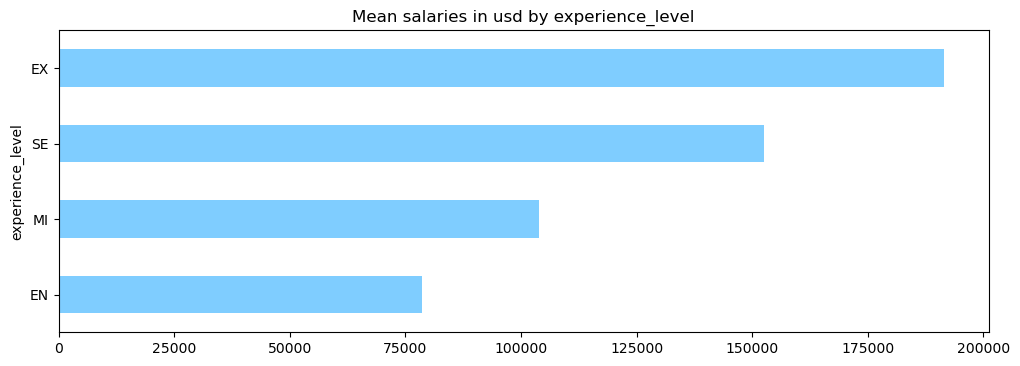

In [18]:
plt.figure(figsize=(12,4),dpi=100)
df.groupby('experience_level').mean()['salary_in_usd'].sort_values(ascending=True).plot(kind='barh',color = '#7fcdff')
plt.title('Mean salaries in usd by experience_level');

Executive level roles have the highest mean salary whereas entry level roles have the lowest mean salary.

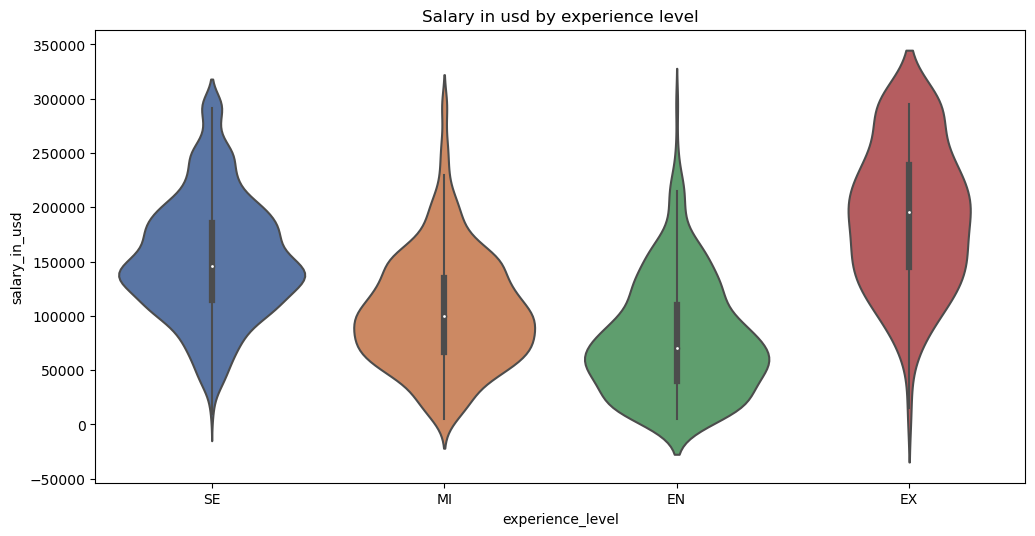

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.violinplot(data=df,x='experience_level',y='salary_in_usd',palette='deep')
plt.title('Salary in usd by experience level');

* Senior roles have mdeian salary of 150000 usd
* Mid/Intermediate roles have median salary of 100000 usd
* Median salary of entry roles fall between 100000 and 50000 usd
* Median salary of executive roles fall between 200000 and 250000 usd

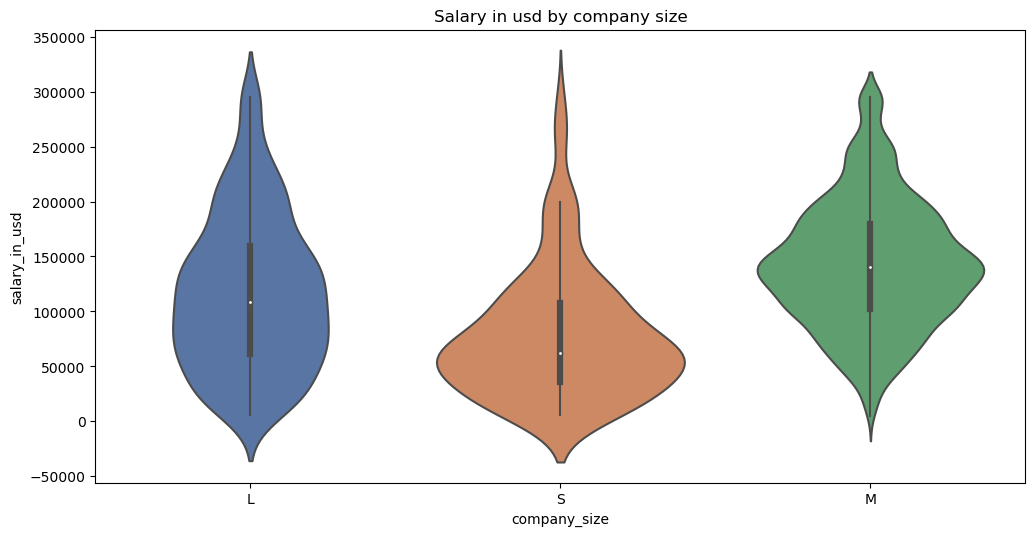

In [23]:
plt.figure(figsize=(12,6),dpi=100)
sns.violinplot(data=df,x='company_size',y='salary_in_usd',palette='deep')
plt.title('Salary in usd by company size');

* Median salary in large company is just above 100000
* Median salary in small company falls between 100000 and 50000
* Median salary in medium company is around 150000.

Median salary in medium firms is relatively higher than large and small companies.

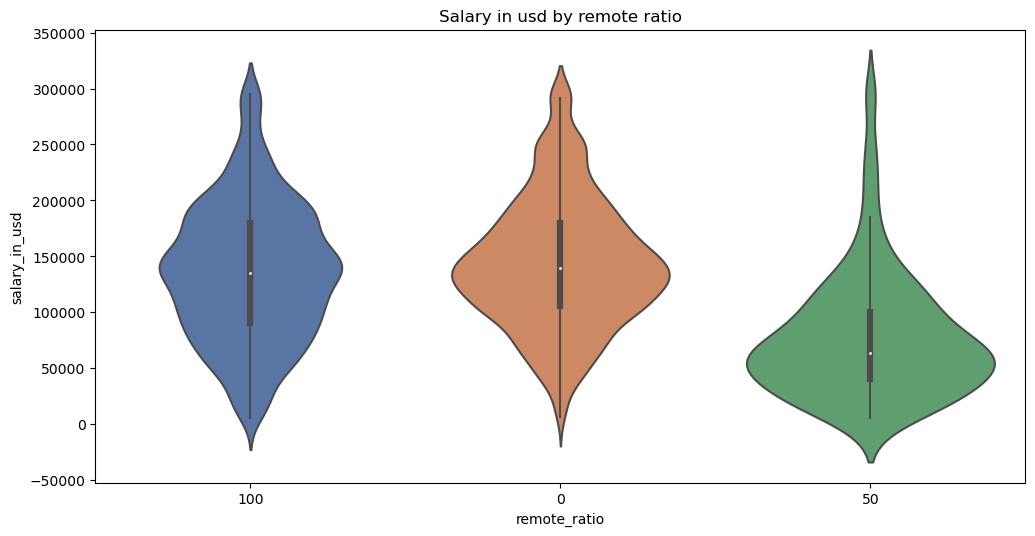

In [24]:
plt.figure(figsize=(12,6),dpi=100)
sns.violinplot(data=df,x='remote_ratio',y='salary_in_usd',palette='deep')
plt.title('Salary in usd by remote ratio');

* Median salary in usd for 0% remote work is higher than 100% and 50% remote work.

In [34]:
df.set_index('work_year',inplace=True)
df.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,
2023-01-01,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100,ES,L
2023-01-01,MI,CT,ML Engineer,30000,USD,30000.0,US,100,US,S
2023-01-01,MI,CT,ML Engineer,25500,USD,25500.0,US,100,US,S
2023-01-01,SE,FT,Data Scientist,175000,USD,175000.0,CA,100,CA,M
2023-01-01,SE,FT,Data Scientist,120000,USD,120000.0,CA,100,CA,M


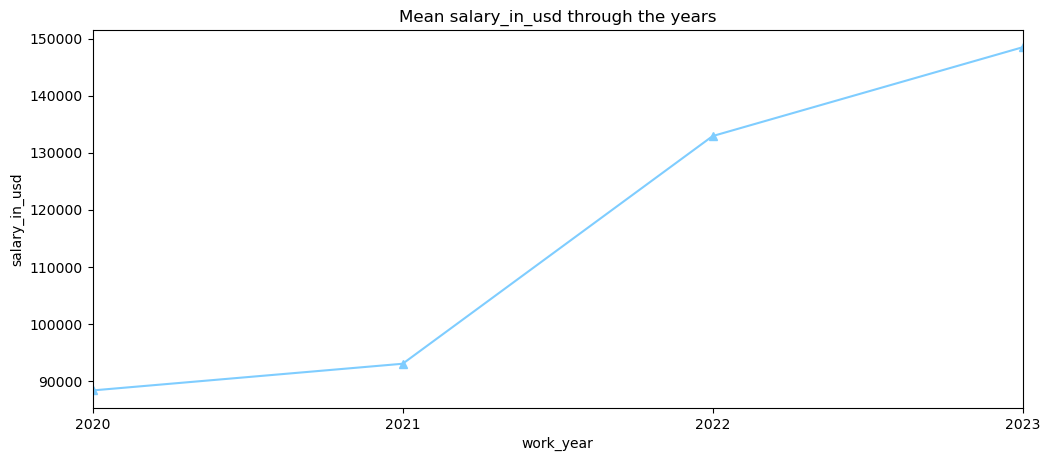

In [37]:
plt.figure(figsize=(12,5),dpi=100)
df.resample('Y').mean()['salary_in_usd'].plot(marker='^',color = '#7fcdff')
plt.ylabel('salary_in_usd')
plt.title('Mean salary_in_usd through the years');

The mean salary of data science related jobs was just below 90000 usd in 2020, it rose to just above 90000 usd in 2021 and then increased drastically to well above 130000 usd in 2022. Then, it further soared to just below 150000 usd in 2023.

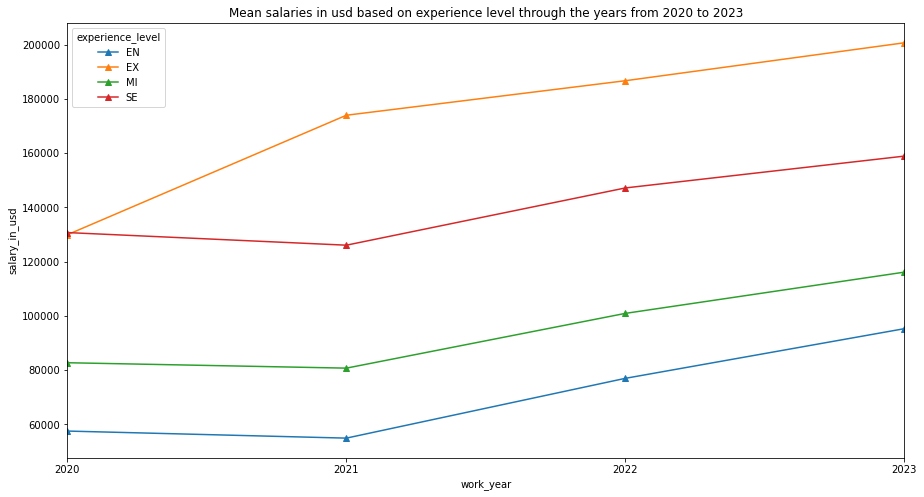

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['work_year','experience_level']).mean()['salary_in_usd'].unstack().plot(ax=ax,marker='^')
plt.ylabel('salary_in_usd')
plt.title('Mean salaries in usd based on experience level through the years from 2020 to 2023');

There was slight dip in the salaries of entry, intermediate and senior in 2021, whereas mean salary of executive level role rose.

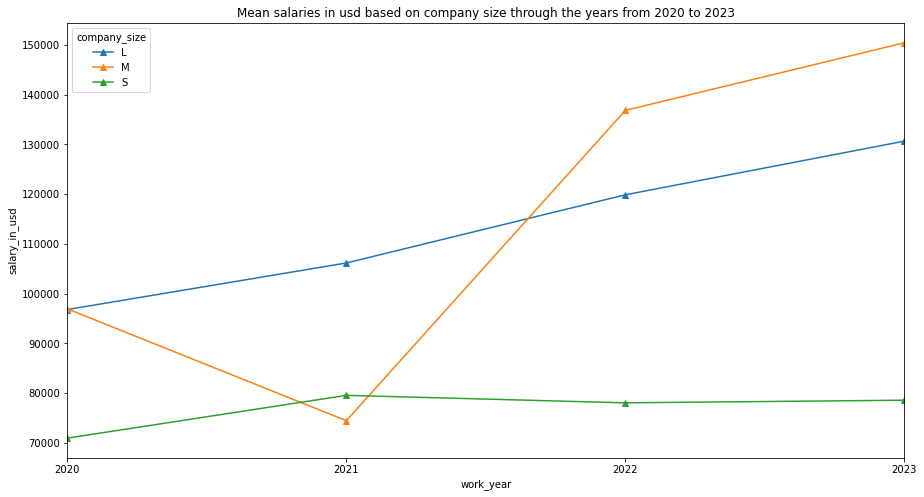

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['work_year','company_size']).mean()['salary_in_usd'].unstack().plot(ax=ax,marker='^')
plt.ylabel('salary_in_usd')
plt.title('Mean salaries in usd based on company size through the years from 2020 to 2023');

The mean salary of data science jobs in small company remained relatively same through the years. However, mean salary in medium company fell from just below 100000 in 2020 to well below 80000 in 2021, which further rose significantly to well above 130000 in 2022 and increased further in 2023. Mean salary in large company has risen consistenly from 2020 to 2023.

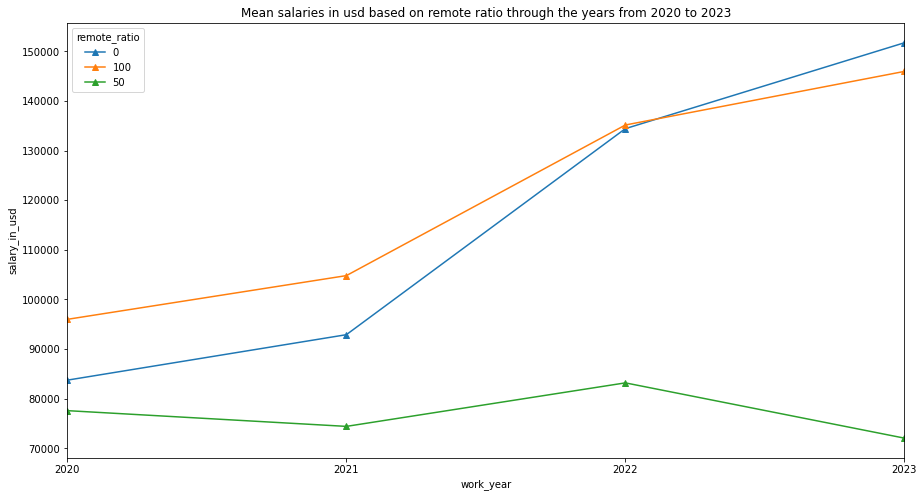

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
df.groupby(['work_year','remote_ratio']).mean()['salary_in_usd'].unstack().plot(ax=ax,marker='^')
plt.ylabel('salary_in_usd')
plt.title('Mean salaries in usd based on remote ratio through the years from 2020 to 2023');

Mean salary of 50% remote work has remained relatively low through the years. Just after 2022, the mean salary of 0% remote work surpassed 100% remote work.

**Thank you!**